<a href="https://colab.research.google.com/github/Alexandr-M-85/Neural-University/blob/main/%D0%90%D1%80%D1%85%D0%B8%D1%82%D0%B5%D0%BA%D1%82%D1%83%D1%80%D0%B0_%D0%B0%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA%D0%B0_(Autoencoder).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание Pro


Обучите автокодировщик на 10 красивых цифрах 5 из mnist и отредактируйте с помощью него все остальные цифры 5.

Алгоритм действий:
1. Выберите 10 самых красивых по вашем мнению пятерок в тренировочной выборке mnist. 
2. Создайте датасет, где объекты – это все пятерки из тренировочной части mnist, а метки – это случайные пятерки из "красивого" набора. 
3. Создайте автокодировщик и проверьте, совпадают ли у него размеры выхода и входа.
4. Обучите автокодировщик.
5. Добейтесь ошибки MSE на тренировочной выборке **<0.05**. 
6. Посмотрите, как выглядят пятерки из тестовой выборки после обученного автокодировщика.

## Импорт библиотек

In [ ]:
# Для операций с тензорами
import numpy as np

# Для отрисвоки
import matplotlib.pyplot as plt

# Для создания модели
from tensorflow.keras.models import Model

# Необходимые слои
from tensorflow.keras.layers import Input, Conv2DTranspose, MaxPooling2D, Conv2D, BatchNormalization

# Слои для латентного пространства модели
from tensorflow.keras.layers import Flatten, Reshape, Dense

# Оптимизатор
from tensorflow.keras.optimizers import Adam

# Для загрузки базы
from tensorflow.keras.datasets import mnist

## Загрузка данных

In [ ]:
# Загрузка датасета
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Нормализация данных
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [ ]:
# Приведение формы к удобной для Keras
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# Отбор пятерок
mask = y_train == 5
X_train = X_train[mask]
y_train = y_train[mask]

In [ ]:
# Аналогично для тестирования
mask = y_test == 5
X_test = X_test[mask]
y_test = y_test[mask]

## Отбор красивых пятерок

In [ ]:
#########################################################
###             МЕСТО ДЛЯ ВАШЕГО КОДА              ###
#########################################################

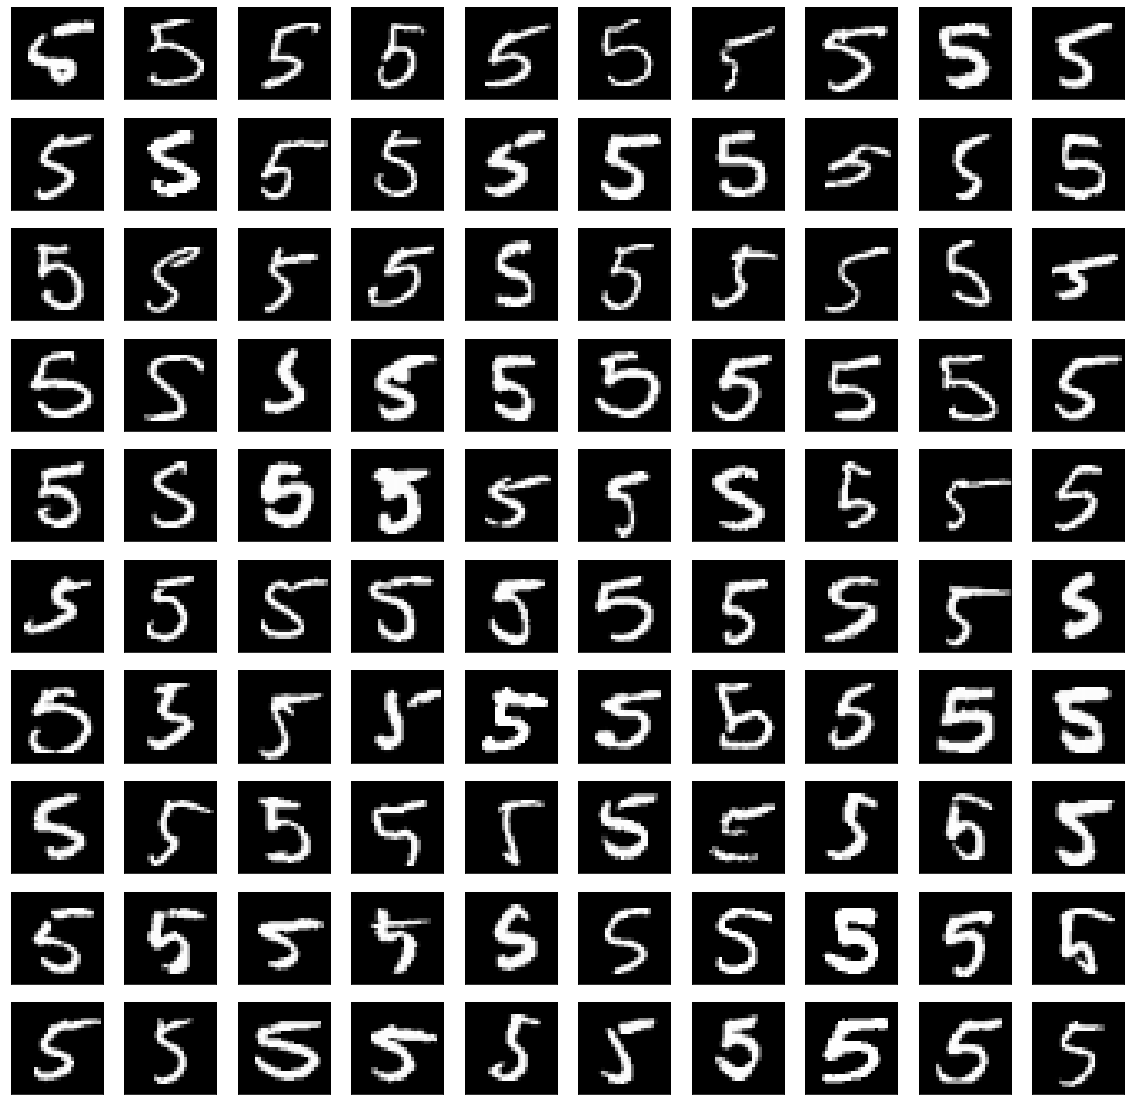

In [ ]:
#выведем первые 100 цифр 5 и выберем 10 красивых
plt.figure(figsize=(20, 20))
for i in range(10):
    for j in range(10):
        ax = plt.subplot(10, 10, i*10 + j + 1)
        plt.imshow(X_test[i*10 + j].reshape(28,28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

In [ ]:
#создадим выборку beauty5 и соберем 10 красивых цифр
beauty5 = np.array([X_test[1],X_test[5],X_test[12],X_test[19],X_test[20],X_test[25],X_test[36],X_test[37],X_test[51],X_test[98]])

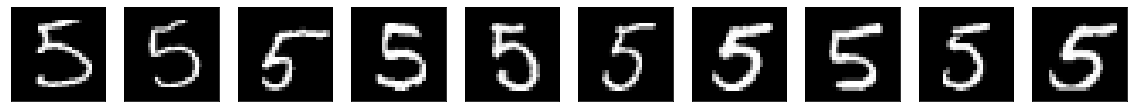

In [ ]:
#посмотрим на собранные цифры
plt.figure(figsize=(20, 10))
for i in range(10):
    ax = plt.subplot(1, 10, i + 1)
    plt.imshow(beauty5[i].reshape(28,28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
#из тестовой выборки удалим цифры, которые отобрали
X_test = np.delete(X_test, 98, axis=0)
X_test = np.delete(X_test, 51, axis=0)
X_test = np.delete(X_test, 37, axis=0)
X_test = np.delete(X_test, 36, axis=0)
X_test = np.delete(X_test, 25, axis=0)
X_test = np.delete(X_test, 20, axis=0)
X_test = np.delete(X_test, 19, axis=0)
X_test = np.delete(X_test, 12, axis=0)
X_test = np.delete(X_test, 5, axis=0)
X_test = np.delete(X_test, 1, axis=0)

In [ ]:
#выведем размерности
print(X_train.shape)
print(beauty5.shape)
print(X_test.shape)

(5421, 28, 28, 1)
(10, 28, 28, 1)
(882, 28, 28, 1)


In [ ]:
#подублируем красивые 5-ки, чтобы количество было равным некрасивым в обучающей и проверочной выборке
X_train_beauty = np.repeat(beauty5, 542, axis=0)
X_train_beauty = np.insert(X_train_beauty, 0, beauty5[0], axis=0)

X_test_beauty = np.repeat(beauty5, 88, axis=0)
X_test_beauty = np.insert(X_test_beauty, 0, beauty5[0], axis=0)
X_test_beauty = np.insert(X_test_beauty, 0, beauty5[0], axis=0)

#выведем размерности
print(X_train.shape)
print(X_train_beauty.shape)
print(X_test.shape)
print(X_test_beauty.shape)

(5421, 28, 28, 1)
(5421, 28, 28, 1)
(882, 28, 28, 1)
(882, 28, 28, 1)


### Модель

Epoch 1/20
543/543 [==============================] - 79s 143ms/step - loss: 0.0598 - val_loss: 0.0481
Epoch 2/20
543/543 [==============================] - 77s 142ms/step - loss: 0.0462 - val_loss: 0.0460
Epoch 3/20
543/543 [==============================] - 77s 142ms/step - loss: 0.0457 - val_loss: 0.0460
Epoch 4/20
543/543 [==============================] - 77s 142ms/step - loss: 0.0456 - val_loss: 0.0456
Epoch 5/20
543/543 [==============================] - 77s 141ms/step - loss: 0.0454 - val_loss: 0.0463
Epoch 6/20
543/543 [==============================] - 77s 142ms/step - loss: 0.0455 - val_loss: 0.0461
Epoch 7/20
543/543 [==============================] - 77s 142ms/step - loss: 0.0454 - val_loss: 0.0461
Epoch 8/20
543/543 [==============================] - 77s 142ms/step - loss: 0.0453 - val_loss: 0.0463
Epoch 9/20
543/543 [==============================] - 77s 142ms/step - loss: 0.0451 - val_loss: 0.0465
Epoch 10/20
543/543 [==============================] - 77s 143ms/step - l

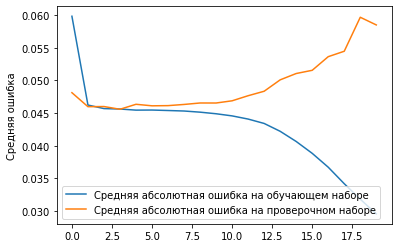

In [ ]:
img_input = Input((28,28,1))

x = Conv2D(16, (3,3), padding='same', activation='relu')(img_input)
x = BatchNormalization()(x)
x = Conv2D(16, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)

x = Conv2D(32, (3,3), padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), padding='same',activation='relu')(x)
x = BatchNormalization()(x)
z = MaxPooling2D()(x)

x = Conv2DTranspose(32,(2,2), strides=(2,2), padding='same',activation='relu')(z)
x = BatchNormalization()(x)

x = Conv2D(32,(3,3),padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3),padding='same',activation='relu')(x)
x = BatchNormalization()(x)

x = Conv2DTranspose(16,(3,3),strides=(2,2),padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(16,(3,3),padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(16,(3,3),padding='same',activation='relu')(x)
x = BatchNormalization()(x)

x = Conv2D(1,(3,3),activation='sigmoid', padding='same')(x)

model = Model(img_input,x) 
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

history = model.fit(X_train, X_train_beauty, epochs=20, batch_size=5,
                    validation_data = (X_test,X_test_beauty))

plt.plot(history.history['loss'],label="Средняя абсолютная ошибка на обучающем наборе")
plt.plot(history.history['val_loss'],label="Средняя абсолютная ошибка на проверочном наборе")
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
#функция для вывода изображений
def plotImages(xTrain, pred, shape=(28, 28)):
    #зададим количество картинок, сколько хотим показать
    n = 5
    plt.figure(figsize=(14, 7))
    for i in range(n):
        index = np.random.randint(0, pred.shape[0])
        # Показываем картинки из тестового набора
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(xTrain[index].reshape(shape))
        plt.gray()
        #скрываем выводы координатных осей
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Показываем восстановленные картинки
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(pred[index].reshape(shape))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

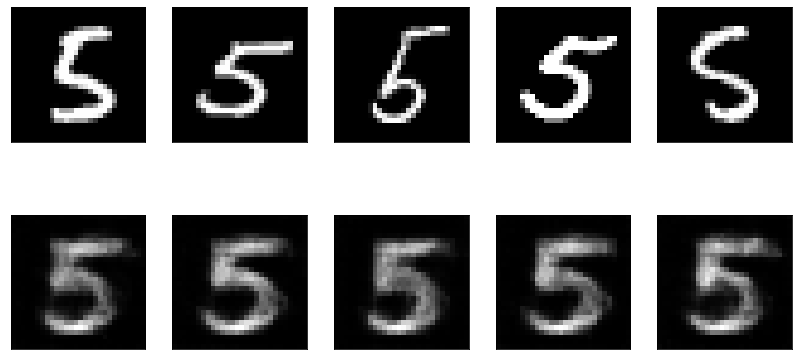

In [ ]:
#выведем исходные и восстановленные картинки
predict = model.predict(X_test)
plotImages(X_test, predict, shape=(28, 28))